# Graph Database Benchmark, Query Performance Results

In [10]:
# Some basic initialiasion
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import HTML

pd.set_option ( 'display.max_columns', 500 )

## Queries and Query Categories
As explained in the main README TODO, we have the following queries and query categories.

In [2]:
# DO NOT EDIT MANUALLY! This was generated through: 
# mvn test -Dtest='QueryListTest#testJsonOut'
#
all_queries = {
  "counts": [
    "cnt",
    "cntType",
    "cntRel",
    "cntRelType"
  ],
  "selects": [
    "sel",
    "join",
    "joinRel",
    "joinFilter",
    "joinRe",
    "joinReif"
  ],
  "unions": [
    "2union",
    "2union1Nest",
    "2union1Nest+",
    "pway",
    "exist",
    "existAg"
  ],
  "aggregation": [
    "grp",
    "grpAg",
    "mulGrpAg",
    "nestAg"
  ],
  "paths": [
    "varPathC",
    "varPath",
    "shrtSmf",
    "medSmf",
    "lngSmf"
  ]
}

And we have tested them against different datasets and graph databases:

In [16]:
# Internal ID -> Label used here
datasets = { 
  "biopax": "biopax",
  "arabidopsis": "ara",
  "poaceae": "cereals"
}

# internal ID => Label Used Here
databases = {
  "sparql": "virt",
   "neo": "neo",
   "arcade": "arc"
}

We ran all the queries for each combination of dataset/DB, and produded 1 result file for each of them:

In [8]:
raw_results = {}
for dataset in datasets.keys():
  for db in databases.keys():
    combo = f"{dataset}-{db}"
    raw_res_path = f"{combo}-results.tsv"
    raw_res = pd.read_csv ( raw_res_path, sep = "\t" )
    raw_res.set_index ( "Name", inplace = True, drop = False )
    raw_results [ combo ] = raw_res

## Results summaries
In the tables below, a per-category summary of all the times taken in the various combinations of datasets and databases  

In [24]:
def get_group_data ( raw_data, queries ):
  gdata = raw_data [ raw_data [ 'Name' ].isin ( queries ) ]
  gdata = gdata [ [ 'Name', 'AvgTime', 'STD' ] ]
    
  return gdata

def get_summary_data ( qgroup ):
  gdata = pd.DataFrame ()
  queries = all_queries [ qgroup ]
  for dataset in datasets.keys ():
    for db in databases.keys():
      combo = f"{dataset}-{db}"

      qdata = raw_results [ combo ]
      qdata = get_group_data ( qdata, queries )

      was_empty = gdata.empty
      ylabel = datasets [ dataset ] + "/" + databases [ db ]
      gdata [ ylabel + " Time" ] = qdata [ "AvgTime" ].copy ()
      gdata [ ylabel + " sdev" ] = qdata [ "STD" ].copy ()

      if was_empty:
        gdata.set_index ( qdata [ "Name" ].copy (), inplace = True )
        gdata.index_name = "Queries"
  
  return gdata
  
data_summaries = {}      
for qgroup in all_queries.keys ():
  gdata = get_summary_data ( qgroup )
  data_summaries [ qgroup ] = gdata
  display ( HTML ( f"<h3>Group: {qgroup}</h3>" ) )
  display ( gdata )

,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
cnt,220.441176,7.650242,0.413793,0.494649,177.125874,15.744378,2028.803150,82.886616,0.456140,0.639972,917.713178,8.815996,8943.053097,58.197300,0.295082,1.080928,4896.591241,1539.757800
cntType,3.931034,17.704200,4.700935,5.291886,186.060870,5.155966,3.795455,15.744011,4.214286,5.157685,995.419118,24.277884,71.201681,602.310419,6.947826,4.213270,5072.715517,1571.163041
cntRel,10.192661,0.396210,0.408000,0.493441,554.766667,18.666347,25.056911,3.219563,0.487603,0.579018,3881.508333,48.566336,77.172131,1.231089,0.225000,1.305853,20424.434109,2995.374762
cntRelType,15.489209,28.341951,6.571429,6.282701,7.760274,90.103489,25.148438,39.668725,7.233645,6.242852,0.495413,0.789091,44.257732,132.162170,7.774648,4.683447,0.489583,0.994668


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
sel,6.323529,0.980418,1.177778,0.689653,2.814159,7.815448,3.038760,0.979502,1.057377,0.266572,2.190476,0.677812,3.818841,0.543515,1.383333,2.146654,3.193548,9.658121
join,5.664122,0.708310,2.395161,15.084488,17.535088,1.130274,6.400000,0.861357,1.059829,0.302022,655.873874,7.773050,7.147287,0.469387,1.452381,4.738957,4158.740741,1802.350534
joinRel,7.180952,0.386825,1.442478,0.865387,2.792593,1.072703,10.252101,2.030356,1.475410,0.980918,3.131783,1.127635,12.707143,0.605686,1.639706,3.054257,3.552239,1.235850
joinFilter,5.163636,0.567099,10.860656,0.964798,0.740741,1.071032,4.913793,1.512665,10.522124,1.408503,1.141593,0.924539,5.159292,0.434379,10.500000,4.322578,8.945736,8.300330
joinRe,5.916667,0.791575,11.542373,0.902457,27.408333,4.698464,6.604651,13.665318,11.405405,0.975876,711.323308,78.095081,6.821138,0.713253,11.058824,2.611234,4070.148760,737.270752
joinReif,7.752475,0.555085,1.698113,0.571878,12.571429,83.101385,10.712963,1.260848,2.133333,0.401490,12.348214,75.335013,13.308271,0.653434,3.268293,7.159853,9.661765,5.148492


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
2union,12.563025,0.576939,2.093750,0.788075,34.021277,2.824556,10.568966,1.439953,2.100917,1.254215,26.688000,0.901755,14.250000,0.455200,3.127119,10.226116,47.842105,13.955471
2union1Nest,9.275510,0.471467,15.968000,1.331601,35.360294,11.564744,10.776596,1.108659,19.338710,1.081155,28.500000,14.958802,14.676471,1.127977,29.434783,12.845322,51.604651,20.603936
2union1Nest+,9.488550,2.220071,17.034783,1.990902,34.730496,4.176258,11.094828,2.358992,17.719008,1.324281,27.257143,1.859726,16.053097,16.236995,28.291262,34.118488,49.222222,16.513698
pway,61.452381,1.077829,41.680000,1.771640,141.297521,28.614287,39.323232,1.412974,34.664179,1.232053,712.776786,159.023807,49.883929,0.581169,67.892473,14.867138,3725.034783,1237.572900
exist,14.056075,0.563543,11.015504,0.847648,12.269231,16.206334,19.785714,1.487530,5.543103,0.677492,12.669643,0.809720,141.253623,0.616815,8.025000,14.766225,44.758065,20.835543
existAg,34.396396,0.607218,14.716667,0.980339,47.284404,2.928442,42.780488,1.944039,12.342105,0.762262,57.297030,8.412544,379.893204,0.999143,22.327869,26.320166,116.020202,47.147398


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
grp,6.689655,0.565897,7.238411,0.607822,22.762712,1.791137,7.201613,2.371853,12.237288,16.713615,724.880734,4.837593,346.773109,0.969335,18.345794,4.629892,4704.354331,1628.997152
grpAg,8.583333,1.132731,7.299145,0.698088,6.613861,1.954330,8.319588,0.810689,10.885246,0.919906,7.443478,2.506802,13.067961,12.024699,18.300752,4.339713,14.680412,11.004304
mulGrpAg,50.000000,0.995927,45.274074,2.244162,50.504673,5.151248,29.008403,1.654454,51.971223,1.769068,58.500000,11.618311,376.944444,0.721283,87.000000,17.525625,155.907407,60.228775
nestAg,8.595420,0.617422,7.108911,0.786142,51.229358,3.537191,15.782258,2.062284,10.875969,1.346336,56.308725,2.013130,348.768595,0.680200,18.272727,5.665686,33.392593,15.793016


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
varPathC,8.155039,14.082597,1.781250,1.097395,82.208333,37.487005,10.000000,3.297883,2.039370,1.217606,92.681416,39.223095,9.858333,3.358911,2.798450,5.287633,211.457627,177.929768
varPath,357.793388,10.052294,3.310078,0.647090,67.917355,8.572812,98.305344,2.950601,1.609091,0.591925,70.511628,5.661156,4.214876,0.432177,3.803419,11.332924,131.681034,52.865309
shrtSmf,2.140496,0.348946,0.708333,0.570947,0.409524,1.071441,14.679245,2.765595,2.781513,0.506896,4.052632,6.688839,229.125984,1.657078,3.038095,8.605593,21.293103,8.118703
medSmf,10.211382,0.617398,0.557252,0.556919,0.816667,1.587680,46.255814,6.497931,2.355769,1.525946,2094.091743,38.902666,3148.770992,3.001448,3.962963,11.053741,3312.796610,1290.639625
lngSmf,22.276923,0.622764,0.690000,0.761378,1.333333,1.224143,92.201613,2.482393,35.230159,1.153518,0.000000,-,17004.155963,29.184018,20.548387,104.261269,0.000000,-


## Result Charts

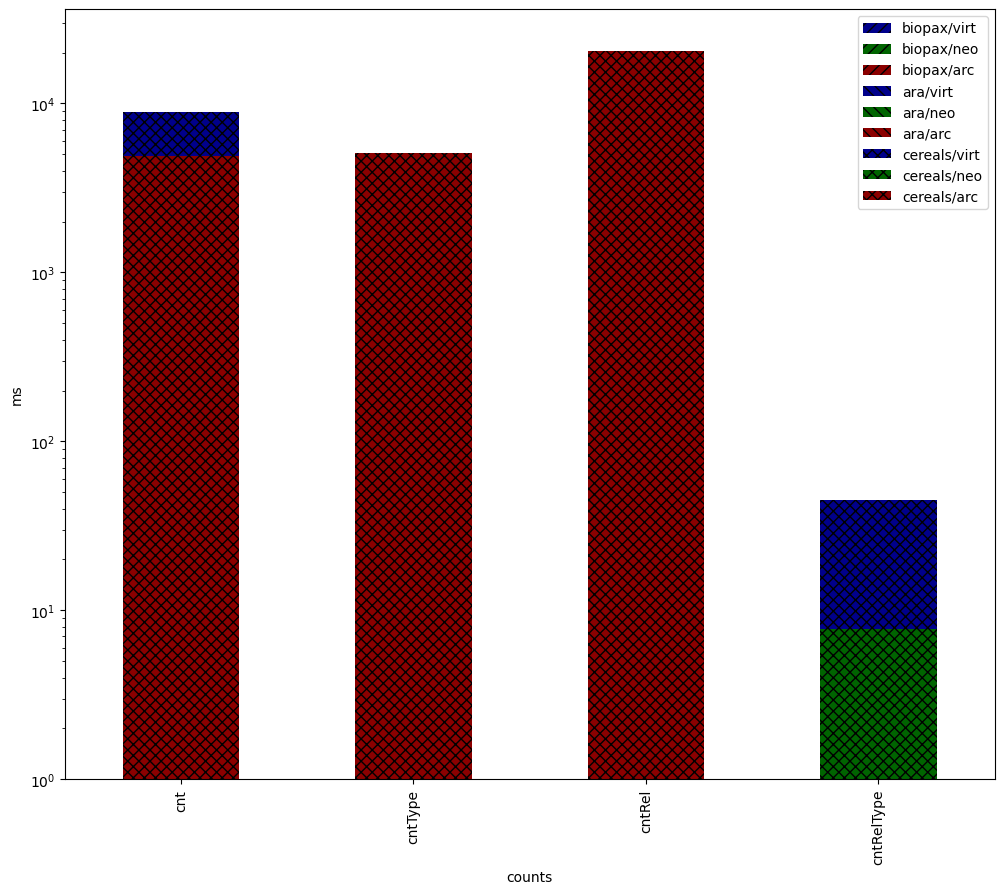

In [57]:
def get_db_color ( db ):
  colors = { "sparql": "DarkBlue", "neo": "DarkGreen", "arcade": "DarkRed" }
  return colors [ db ]

def get_colors_dict ():
  cdict = {}
  for dataset in datasets.keys ():
    for db in databases.keys():
      combo_prefx = datasets [ dataset ] + "/" + databases [ db ]
      yid = combo_prefx + " Time"
      color = get_db_color ( db )
      cdict [ yid ] = color
  return cdict
    
def get_dataset_hatch ( dset ):
  hatches = { "biopax": "///", "arabidopsis": "\\\\\\", "poaceae": "XXX" }
  return hatches [ dset ]


def group_chart ( qgroup ):
  ax = None
  gdata = data_summaries [ qgroup ]
  for dataset in datasets.keys ():
    for db in databases.keys():
      combo_prefx = datasets [ dataset ] + "/" + databases [ db ]
      ylabel = combo_prefx
      yid = combo_prefx + " Time"
      ycolor = get_db_color ( db )
      yhatch = get_dataset_hatch ( dataset )
      ax = gdata.plot.bar ( y = yid, label = ylabel, color = ycolor, hatch = yhatch, 
        stacked = False, log = True, ax = ax )
      #if not ax: ax = ax1

  ax.set_xlabel ( qgroup )
  ax.set_ylabel ( "ms" )

  # To cope with 0
  ax.set_ylim ( ymin = 1 )
    
  # Give it a good size
  ax.figure.set_size_inches ( 12, 10 )

def group_chart_1 ( qgroup ):
  gdata = data_summaries [ qgroup ]
  for dataset in datasets.keys ():
    for db in databases.keys():
      combo_prefx = datasets [ dataset ] + "/" + databases [ db ]
      gdata = gdata.drop ( combo_prefx + " sdev", axis = 1 )
        
  ax = gdata.plot.bar ( color = get_colors_dict(), log = True )    
  ax.set_xlabel ( qgroup )
  ax.set_ylabel ( "ms" )

  # To cope with 0
  ax.set_ylim ( ymin = 1 )

  # Give it a good size
  ax.figure.set_size_inches ( 12, 10 )



for qgroup in all_queries.keys ():
  group_chart ( qgroup )
  break